In [17]:
from linefilter import LineFilter
import matplotlib.pyplot as plt
from birdseye import Birdseye
from utils import roi
import numpy as np
import pickle
import cv2

In [2]:
calibration_data = pickle.load(open("calibration_data.pkl","rb"))

camera_matrix = calibration_data["camera_matrix"]
dist_coef = calibration_data["distortion_coefficient"]

source_points = [(580, 460), (205, 720), (1110, 720), (703, 460)]
dest_points = [(320, 0), (320, 720), (960, 720), (960, 0)]

p = { 'sat_thresh': 120, 
     'light_thresh': 40, 
     'light_thresh_agr': 205,
     'grad_thresh': (0.7, 1.4), 
     'mag_thresh': 40, 
     'x_thresh': 20 }

birdEye = Birdseye(source_points, dest_points, camera_matrix, dist_coef)
lineFilter = LineFilter(p)


In [19]:
def line_filter(path):
    img = cv2.imread(path)
    img = birdEye.undistort(img)
    binary = lineFilter.apply(img)
    masked_lane = np.logical_and(birdEye.sky_view(binary), roi(binary))
    sobel_img = birdEye.sky_view(lineFilter.sobel_breakdown(img))
    color_img = birdEye.sky_view(lineFilter.color_breakdown(img))
    show_images([color_img, sobel_img, masked_lane], per_row = 3, per_col = 1, W = 15, H = 5)

In [18]:
def show_images(imgs, per_row = 3, per_col = 2, W = 10, H = 5, tdpi = 80):

    fig, ax = plt.subplots(per_col, per_row, figsize = (W, H), dpi = tdpi)
    ax = ax.ravel()

    for i in range(len(imgs)):
        img = imgs[i]
        ax[i].imshow(img)

    for i in range(per_row * per_col):
        ax[i].axis('off')

test_images/test1.jpg
test_images/test2.jpg
test_images/test3.jpg
test_images/test4.jpg
test_images/test5.jpg
test_images/test6.jpg


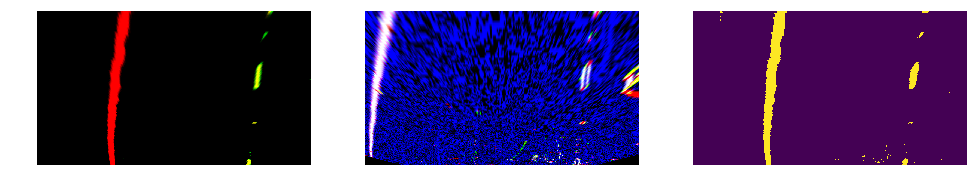

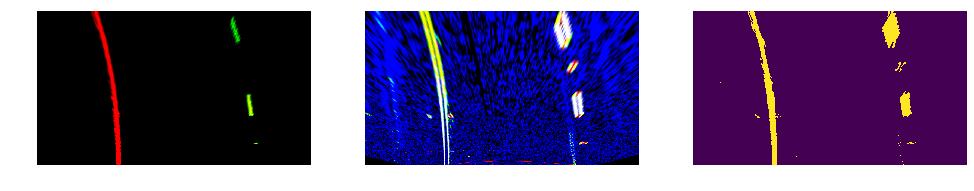

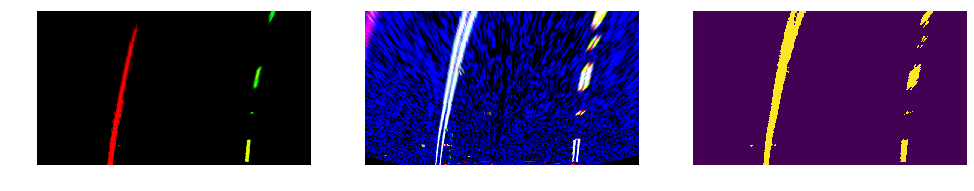

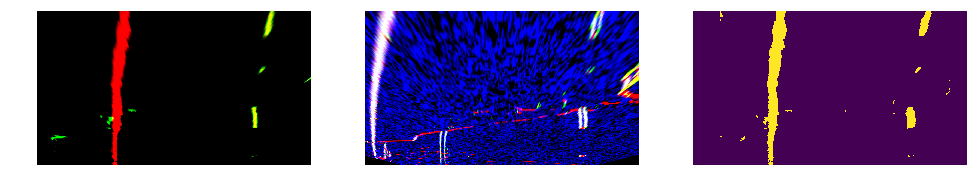

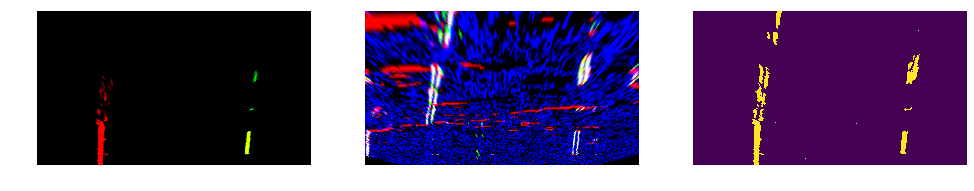

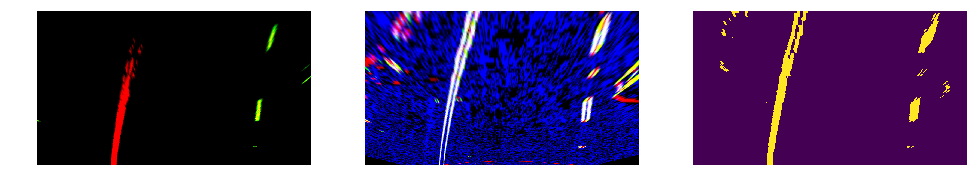

In [23]:
for i in range(1, 7):
    path = "test_images/test" + str(i) + ".jpg"
    print(path)
    line_filter(path)

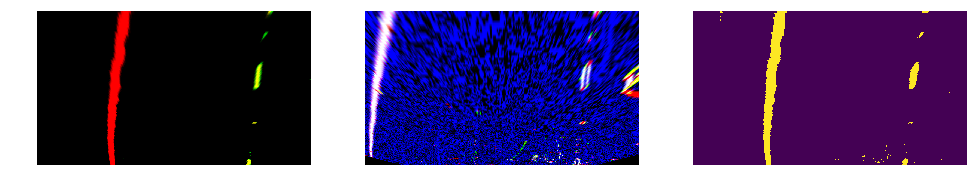

In [24]:
line_filter("test_images/test1.jpg")